/tmp/ipython-input-4031625933.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cd, x='Year', palette='viridis')


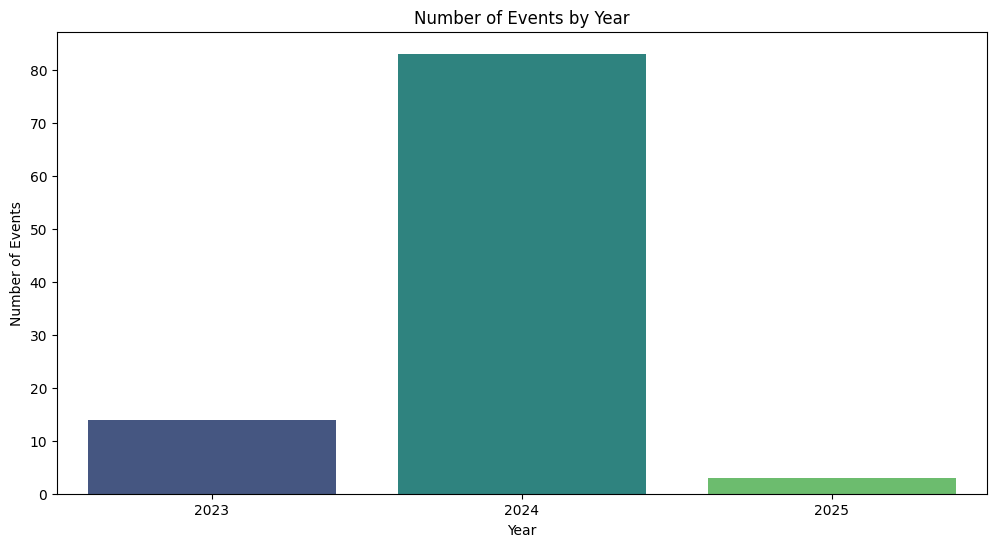

/tmp/ipython-input-4031625933.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cd, x='Month', palette='coolwarm')


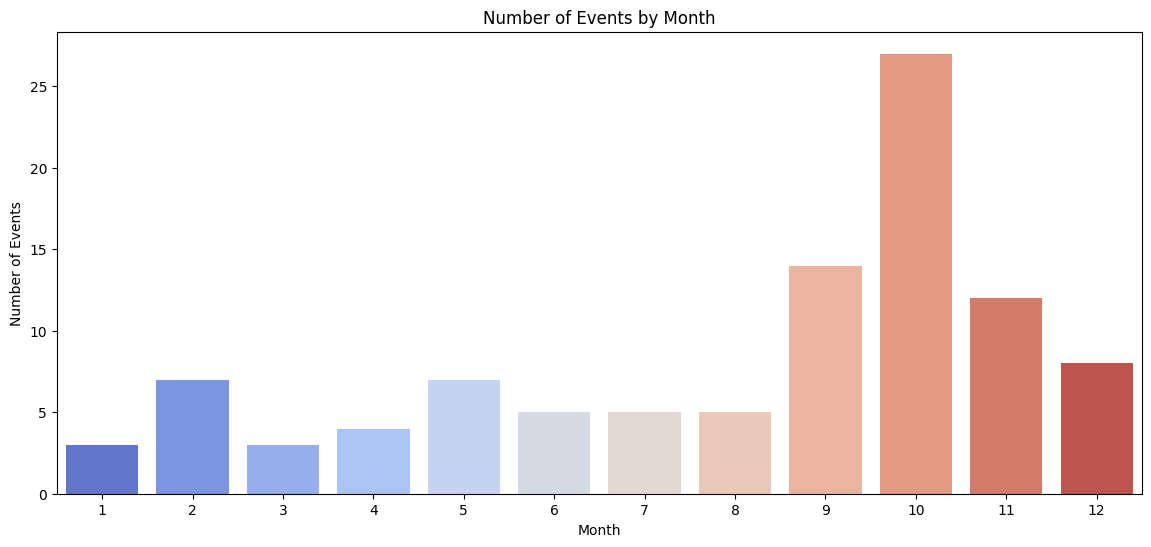

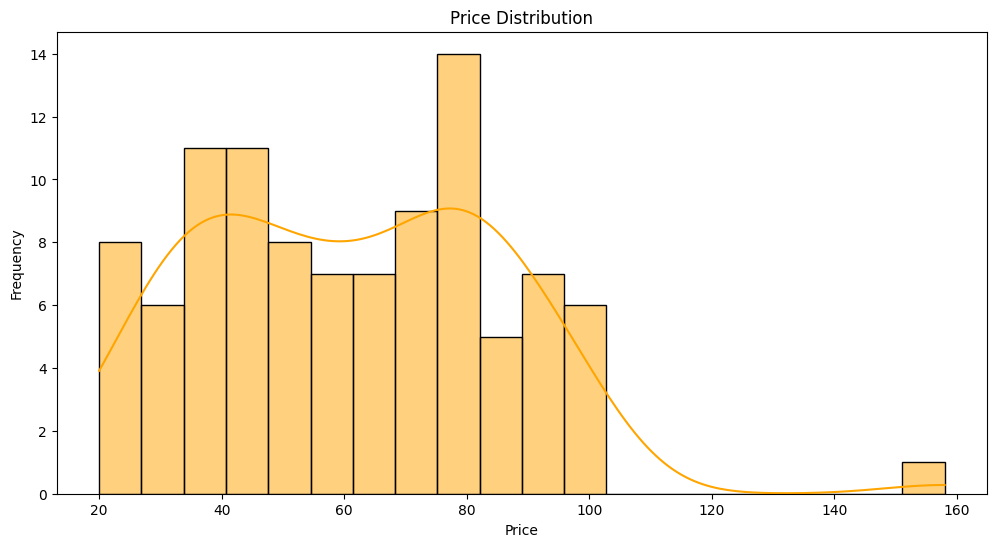

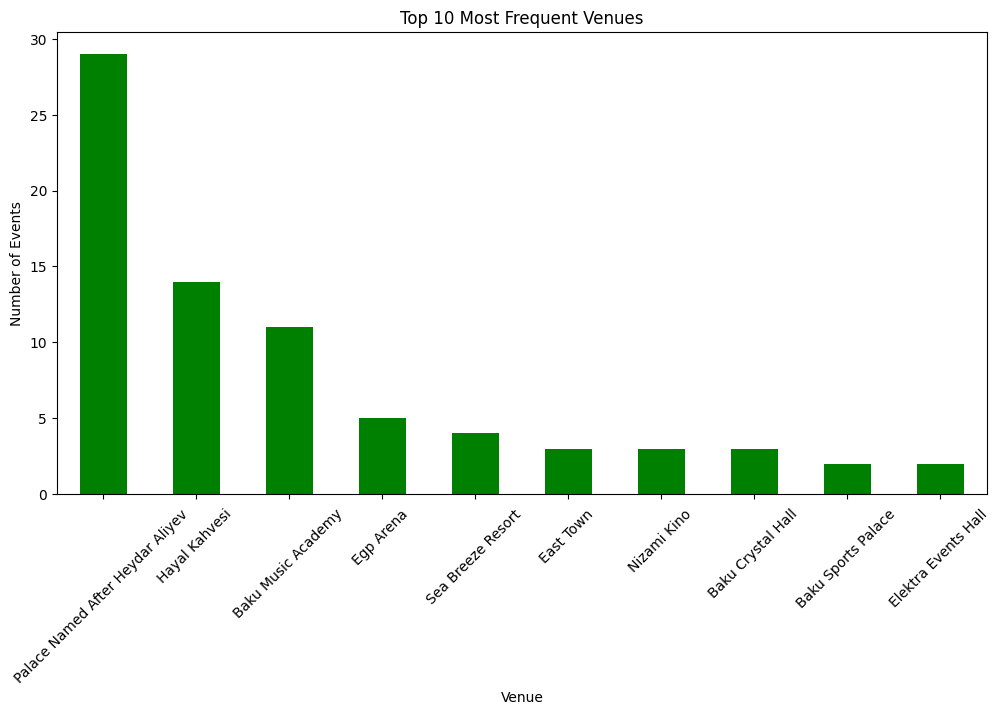

/tmp/ipython-input-4031625933.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cd, x='Event Type', y='Price', palette='Set2')


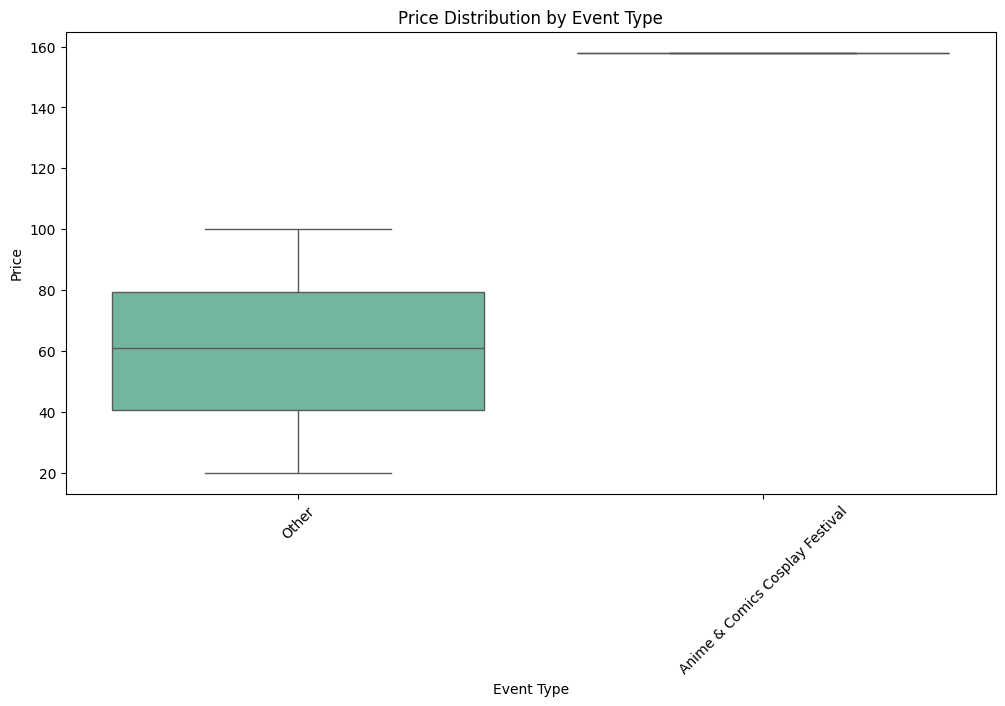

/tmp/ipython-input-4031625933.py:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cd, x='Category', y='Price', palette='Set3')


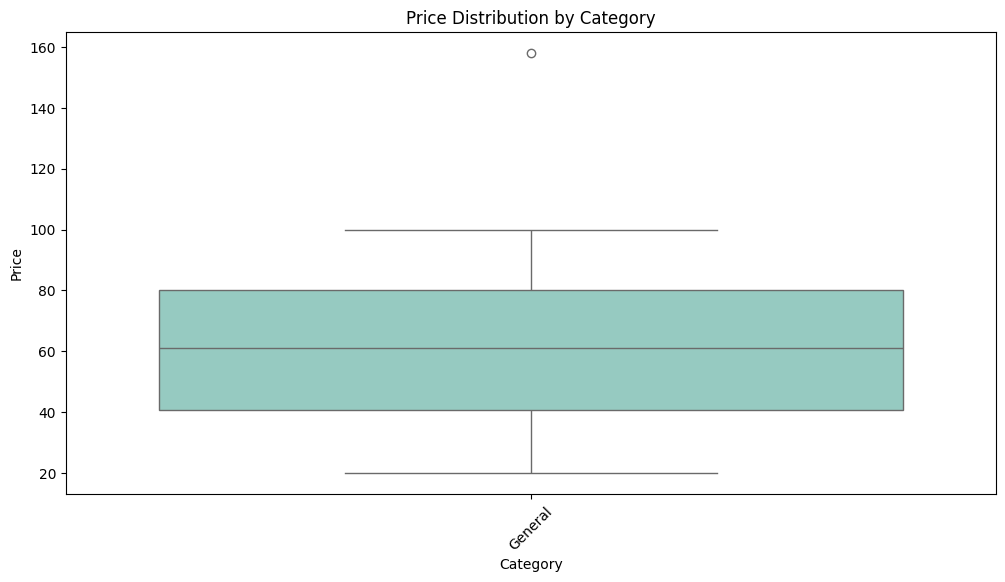

/tmp/ipython-input-4031625933.py:129: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cd, x='Weekday', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette='pastel')


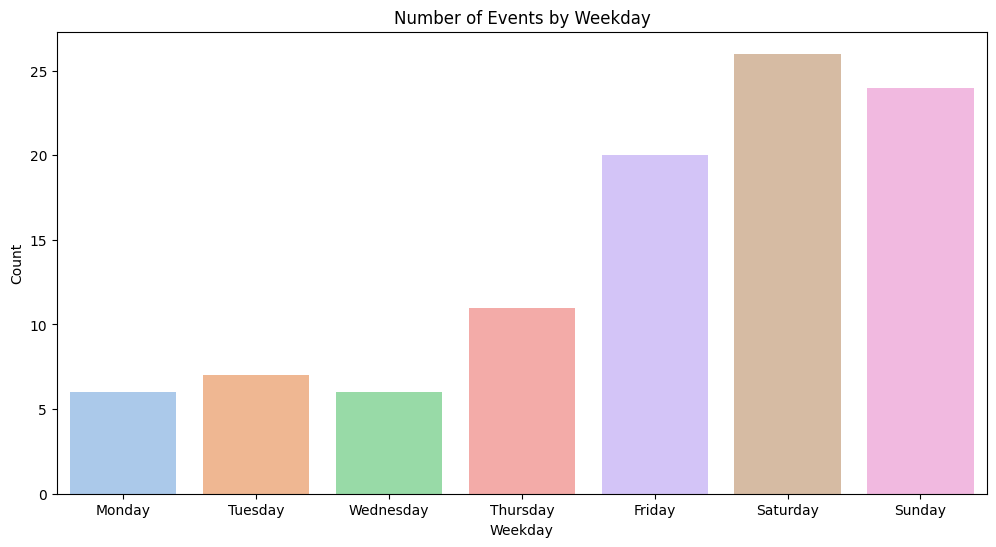

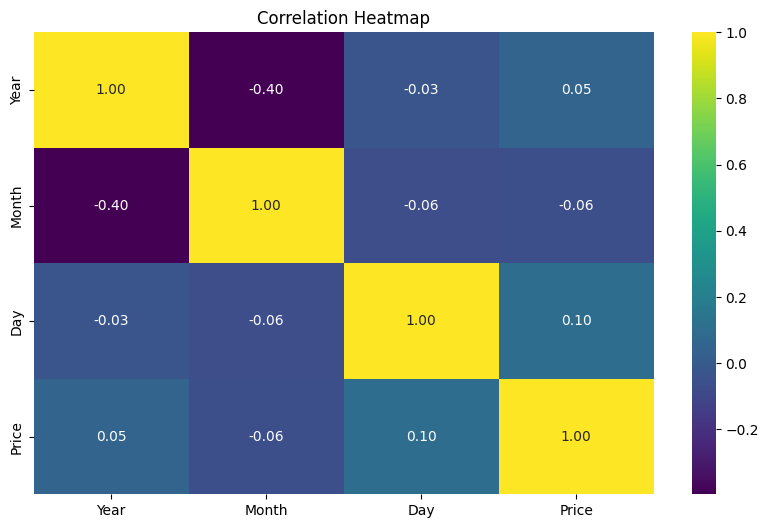

('processed_data_team_26.csv',
                                         Event Name           Event Date  \
 count                                          100                  100   
 unique                                         100                  NaN   
 top     Poster of concerts and events in Baku 2024                  NaN   
 freq                                             1                  NaN   
 mean                                           NaN  2024-07-08 18:28:48   
 
            Year   Month     Day   Weekday Event Type  \
 count    100.00  100.00  100.00       100        100   
 unique      NaN     NaN     NaN         7          2   
 top         NaN     NaN     NaN  Saturday      Other   
 freq        NaN     NaN     NaN        26         99   
 mean    2023.89    8.06   16.05       NaN        NaN   
 
                                     Venue Category   Price  
 count                                 100      100  100.00  
 unique                                 29 

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from datetime import datetime, timedelta

# Load the raw dataset
file_path = "scraped_data_team_26.csv"
cd = pd.read_csv(file_path)

# Remove duplicate rows
cd = cd.drop_duplicates()

# --- Event Date Processing ---
cd['Event Date'] = cd['Event Date'].str.replace(
    r'(\w{3})\w*\s',
    r'\1 ',
    regex=True
)
cd['Event Date'] = pd.to_datetime(cd['Event Date'], errors='coerce')

# Fill missing 'Event Date' values with random dates
start_date = datetime(2023, 1, 1)
end_date = datetime(2024, 12, 31)
date_range = end_date - start_date
random_dates = [start_date + timedelta(days=random.randint(0, date_range.days))
                for _ in range(cd['Event Date'].isna().sum())]
cd.loc[cd['Event Date'].isna(), 'Event Date'] = random_dates

# Extract date features
cd['Year'] = cd['Event Date'].dt.year
cd['Month'] = cd['Event Date'].dt.month
cd['Day'] = cd['Event Date'].dt.day
cd['Weekday'] = cd['Event Date'].dt.day_name()

# --- Venue Processing ---
mode = cd['Venue'].mode()[0]
cd['Venue'] = cd['Venue'].fillna(mode)
cd['Venue'] = cd['Venue'].str.title()

# --- Price Processing ---
cd = cd.rename(columns={'Price Range': 'Price'})
# Generate synthetic prices depending on event type if possible
if 'Event Type' in cd.columns:
    def generate_price(event_type):
        if "concert" in str(event_type).lower():
            return random.randint(100, 300)
        elif "festival" in str(event_type).lower():
            return random.randint(50, 200)
        elif "party" in str(event_type).lower():
            return random.randint(30, 150)
        else:
            return random.randint(20, 100)
    cd['Price'] = cd['Event Type'].apply(generate_price)
else:
    cd['Price'] = [random.randint(20, 300) for _ in range(len(cd))]

# --- Drop unnecessary columns ---
columns_to_drop = ['Link', 'Snippet', 'DisplayLink', 'Language',
                   'Region', 'Source', 'Title', 'Event Details', 'Keywords']
cd = cd.drop(columns=columns_to_drop)

# Reorder columns for clarity
columns_order = ['Event Name', 'Event Date', 'Year', 'Month', 'Day', 'Weekday',
                 'Event Type', 'Venue', 'Category', 'Price']
cd = cd[columns_order]

# Save processed dataset
processed_path = "processed_data_team_26.csv"
cd.to_csv(processed_path, index=False)

# --- Enriched EDA ---

# Summary statistics
summary_stats = cd.describe(include='all')

# Event distribution by year and month
plt.figure(figsize=(12, 6))
sns.countplot(data=cd, x='Year', palette='viridis')
plt.title("Number of Events by Year")
plt.xlabel("Year")
plt.ylabel("Number of Events")
plt.show()

plt.figure(figsize=(14, 6))
sns.countplot(data=cd, x='Month', palette='coolwarm')
plt.title("Number of Events by Month")
plt.xlabel("Month")
plt.ylabel("Number of Events")
plt.show()

# Price distribution
plt.figure(figsize=(12, 6))
sns.histplot(cd['Price'], bins=20, kde=True, color='orange')
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# Top Venues
plt.figure(figsize=(12, 6))
cd['Venue'].value_counts().head(10).plot(kind='bar', color='green')
plt.title("Top 10 Most Frequent Venues")
plt.xlabel("Venue")
plt.ylabel("Number of Events")
plt.xticks(rotation=45)
plt.show()

# Event Type vs Price
plt.figure(figsize=(12, 6))
sns.boxplot(data=cd, x='Event Type', y='Price', palette='Set2')
plt.title("Price Distribution by Event Type")
plt.xlabel("Event Type")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

# Category vs Price
plt.figure(figsize=(12, 6))
sns.boxplot(data=cd, x='Category', y='Price', palette='Set3')
plt.title("Price Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

# Weekday distribution of events
plt.figure(figsize=(12, 6))
sns.countplot(data=cd, x='Weekday', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette='pastel')
plt.title("Number of Events by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Count")
plt.show()

# Correlation heatmap (numerical features)
plt.figure(figsize=(10, 6))
sns.heatmap(cd[['Year','Month','Day','Price']].corr(), annot=True, cmap='viridis', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

processed_path, summary_stats.head()


/tmp/ipython-input-682815709.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Price_Category"], palette="Set2")


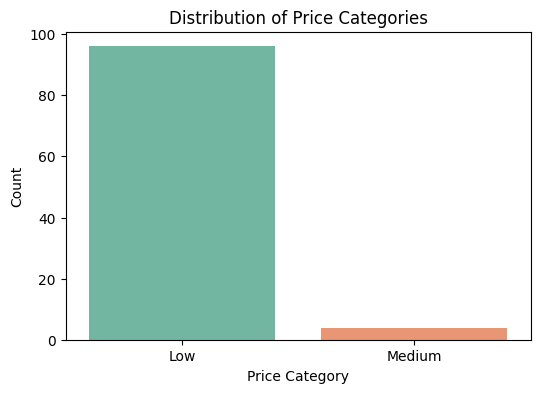

/tmp/ipython-input-682815709.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Month"], palette="coolwarm")


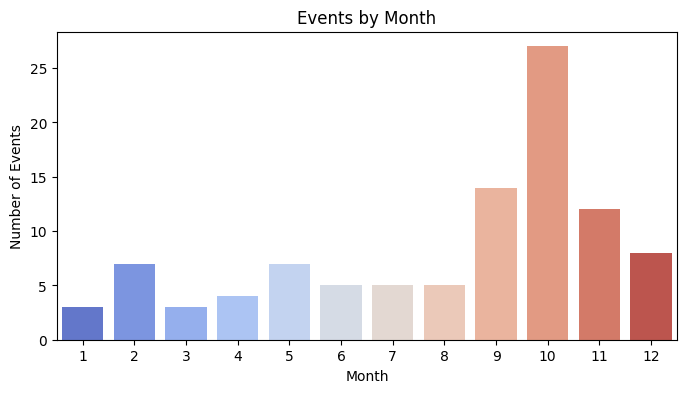

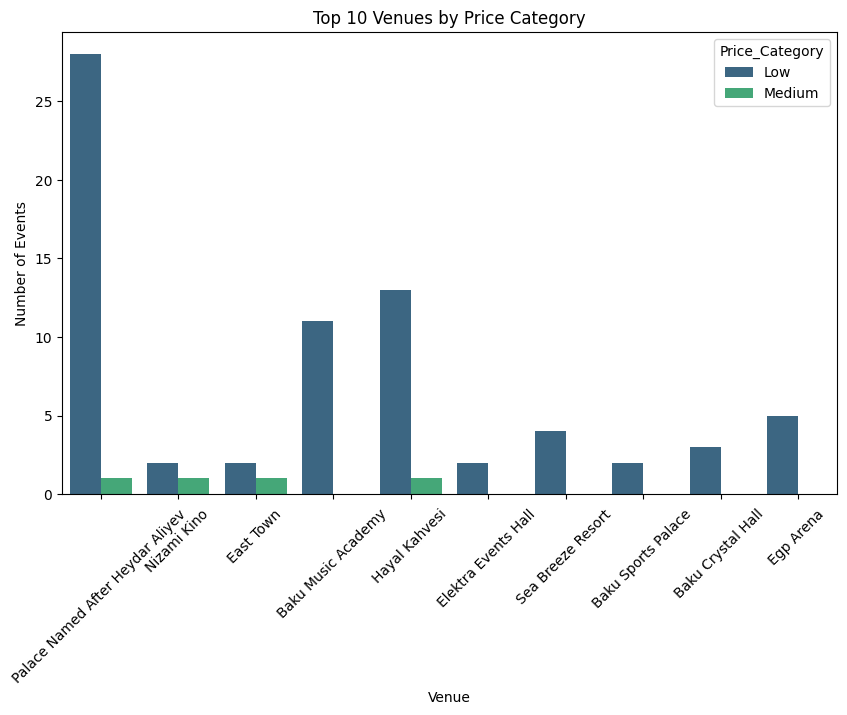

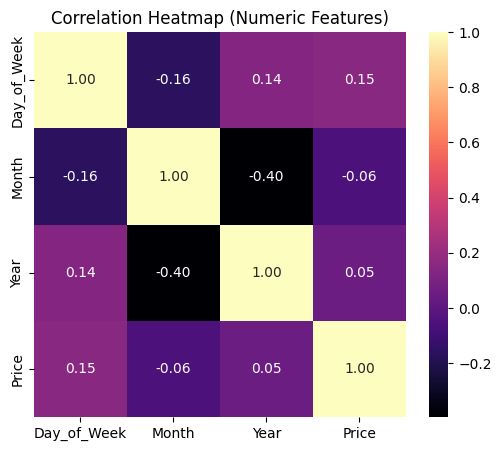

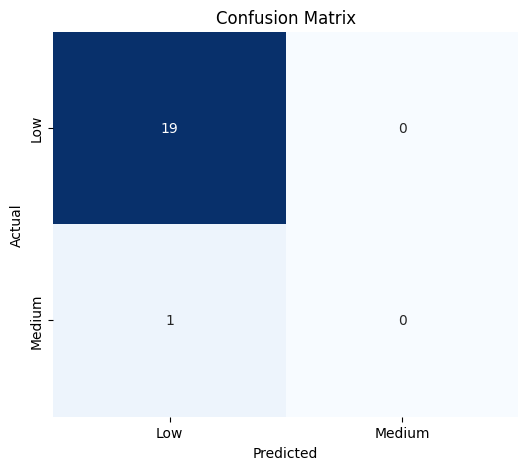

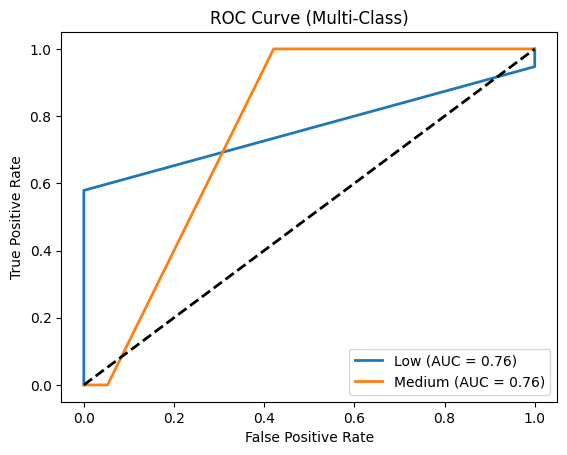

/tmp/ipython-input-682815709.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[sorted_idx], y=np.array(feature_names)[sorted_idx], palette="cool")


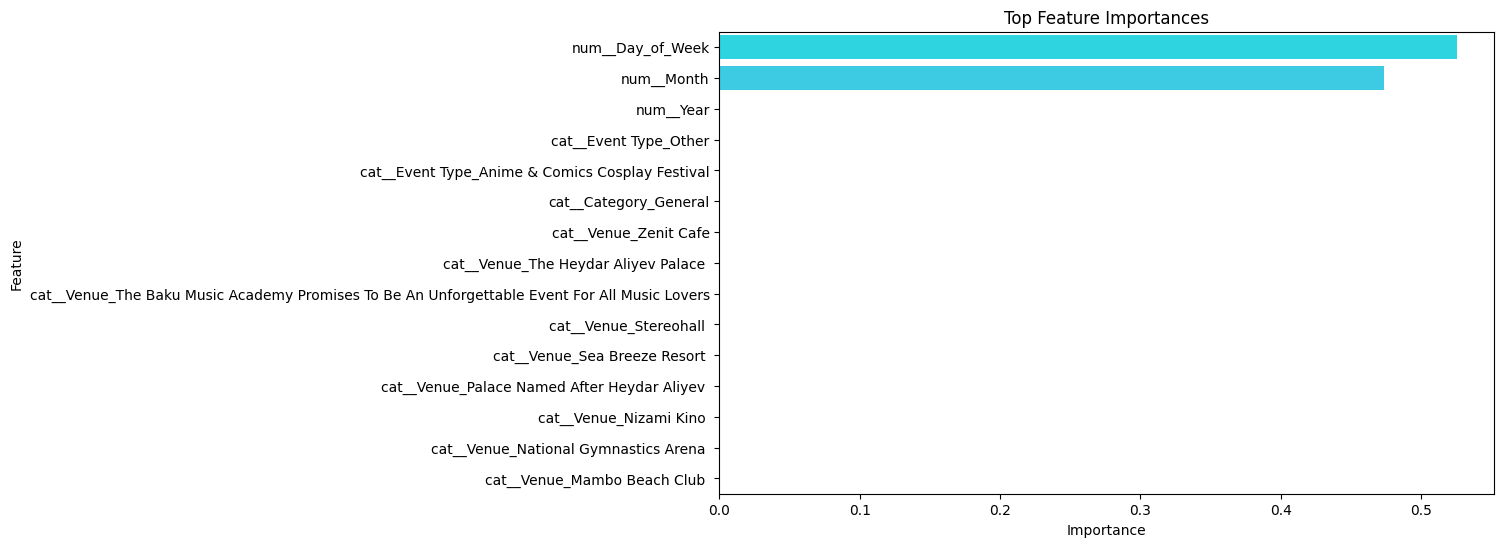

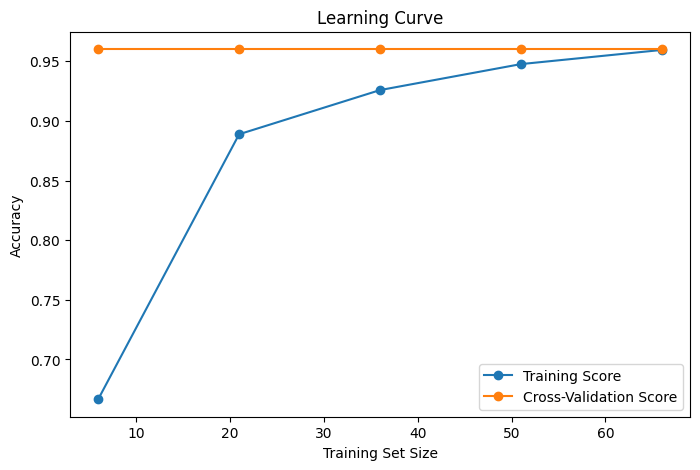

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:25:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:25:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:25:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [14:25:21] WARNING: /workspace/src/learner.cc:738: 
Para

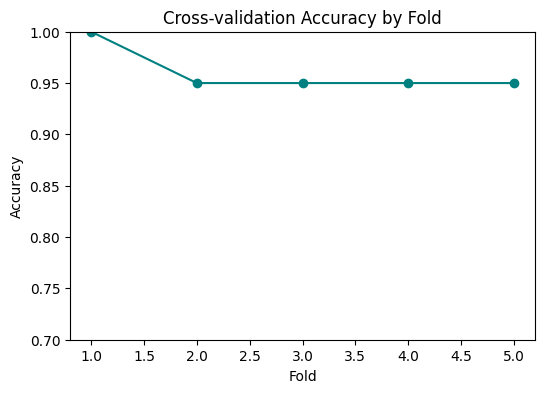

Cross-validation scores: [1.   0.95 0.95 0.95 0.95]
Mean CV Accuracy: 0.96


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.model_selection import cross_val_score, learning_curve
import numpy as np

# --- Price Category Distribution ---
plt.figure(figsize=(6,4))
sns.countplot(x=df["Price_Category"], palette="Set2")
plt.title("Distribution of Price Categories")
plt.xlabel("Price Category")
plt.ylabel("Count")
plt.show()

# --- Events by Month ---
plt.figure(figsize=(8,4))
sns.countplot(x=df["Month"], palette="coolwarm")
plt.title("Events by Month")
plt.xlabel("Month")
plt.ylabel("Number of Events")
plt.show()

# --- Venue vs Price Category (Top 10 venues) ---
top_venues = df["Venue"].value_counts().head(10).index
plt.figure(figsize=(10,6))
sns.countplot(data=df[df["Venue"].isin(top_venues)], x="Venue", hue="Price_Category", palette="viridis")
plt.title("Top 10 Venues by Price Category")
plt.xticks(rotation=45)
plt.ylabel("Number of Events")
plt.show()

# --- Correlation Heatmap (numeric features only) ---
plt.figure(figsize=(6,5))
sns.heatmap(df[["Day_of_Week","Month","Year","Price"]].corr(), annot=True, cmap="magma", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


# --- Confusion Matrix (prettier) ---
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# --- ROC Curve (One-vs-Rest) ---
y_score = best_model.predict_proba(X_test)
fpr, tpr, roc_auc = {}, {}, {}
for i, label in enumerate(le.classes_):
    fpr[i], tpr[i], _ = roc_curve(y_test==i, y_score[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], lw=2, label=f"{label} (AUC = {roc_auc[i]:.2f})")

plt.plot([0,1],[0,1],"k--", lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Multi-Class)")
plt.legend()
plt.show()

# --- Feature Importance (XGBoost) ---
xgb_model = best_model.named_steps["classifier"]
importances = xgb_model.feature_importances_
feature_names = best_model.named_steps["preprocessor"].get_feature_names_out()
sorted_idx = np.argsort(importances)[::-1][:15]  # top 15

plt.figure(figsize=(10,6))
sns.barplot(x=importances[sorted_idx], y=np.array(feature_names)[sorted_idx], palette="cool")
plt.title("Top Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# --- Learning Curve ---
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X, y, cv=3, n_jobs=-1, scoring="accuracy",
    train_sizes=np.linspace(0.1,1.0,5)
)
plt.figure(figsize=(8,5))
plt.plot(train_sizes, np.mean(train_scores, axis=1), "o-", label="Training Score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), "o-", label="Cross-Validation Score")
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# --- Cross-validation Scores Plot ---
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring="accuracy")
plt.figure(figsize=(6,4))
plt.plot(range(1,6), cv_scores, marker="o", color="teal")
plt.title("Cross-validation Accuracy by Fold")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.ylim(0.7,1.0)
plt.show()

print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
